In [61]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

import lib.Tensor as T # module
from lib.Tensor import Tensor # main tensor class
from lib.NN import Sequential, Dense, ReLU, MSELoss
from lib.Optimizers import SGD

## Data

In [35]:
data = pd.read_csv('../data/iris.csv')

In [36]:
data.set_index('Id', inplace=True)

In [42]:
data.loc[:, 'Species_enc'] = data.loc[:, 'Species'].factorize()[0] # dont set the 'Species' column because it will retain Object type

In [48]:
data.drop('Species', axis=1, inplace=True)

In [49]:
x = data.drop('Species_enc', axis=1).values
y = data['Species_enc'].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

x_train_tensor = Tensor(x_train, requires_grad=True)
x_test_tensor = Tensor(x_test, requires_grad=True)
y_train_tensor = Tensor(y_train, requires_grad=True)
y_test_tensor = Tensor(y_test, requires_grad=True)

In [50]:
for item in [x_train, x_test, y_train, y_test]:
    print(item.dtype)
for item in [x_train_tensor, x_test_tensor, y_train_tensor, y_test_tensor]:
    print(item.dtype)

float64
float64
int64
int64
float64
float64
int64
int64


In [57]:
if y_train_tensor.ndim == 1:
    y_train_tensor = y_train_tensor.reshape(-1, 1)
if y_test_tensor.ndim == 1:
    y_test_tensor = y_test_tensor.reshape(-1, 1)

## Model

In [72]:
model = Sequential(
    Dense(4, 10),
    ReLU(),
    Dense(10, 4)
)

type(model)

criterion = MSELoss()
optimizer = SGD(model.parameters(), lr=0.001)

In [73]:
epochs = 3000
running_train_loss = []
running_test_loss = []

for epoch in range(1, epochs+1):
    model.train()
    y_pred = model(x_train_tensor)

    loss = criterion(y_pred, y_train_tensor)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    running_train_loss.append(loss.data)

    with T.no_grad():
        model.eval()
        y_pred = model(x_test_tensor)
        if y_test.ndim == 1:
            y_test = y_test.reshape(-1, 1)
        loss = criterion(y_pred, y_test_tensor)
        running_test_loss.append(loss.data)

    if epoch % 100 == 0:
        print(f'Epoch: {epoch} Train Loss: {running_train_loss[-1]:.04f} Val Loss: {running_test_loss[-1]:.04f}')

Epoch: 100 Train Loss: 1.5920 Test Loss: 1.3968
Epoch: 200 Train Loss: 1.4318 Test Loss: 1.2558
Epoch: 300 Train Loss: 1.0991 Test Loss: 0.9645
Epoch: 400 Train Loss: 0.6223 Test Loss: 0.5683
Epoch: 500 Train Loss: 0.4180 Test Loss: 0.4264
Epoch: 600 Train Loss: 0.3793 Test Loss: 0.4067
Epoch: 700 Train Loss: 0.3592 Test Loss: 0.3901
Epoch: 800 Train Loss: 0.3401 Test Loss: 0.3710
Epoch: 900 Train Loss: 0.3211 Test Loss: 0.3511
Epoch: 1000 Train Loss: 0.3020 Test Loss: 0.3309
Epoch: 1100 Train Loss: 0.2829 Test Loss: 0.3105
Epoch: 1200 Train Loss: 0.2637 Test Loss: 0.2900
Epoch: 1300 Train Loss: 0.2445 Test Loss: 0.2694
Epoch: 1400 Train Loss: 0.2256 Test Loss: 0.2490
Epoch: 1500 Train Loss: 0.2070 Test Loss: 0.2288
Epoch: 1600 Train Loss: 0.1890 Test Loss: 0.2092
Epoch: 1700 Train Loss: 0.1718 Test Loss: 0.1904
Epoch: 1800 Train Loss: 0.1556 Test Loss: 0.1726
Epoch: 1900 Train Loss: 0.1406 Test Loss: 0.1561
Epoch: 2000 Train Loss: 0.1270 Test Loss: 0.1410
Epoch: 2100 Train Loss: 0.114

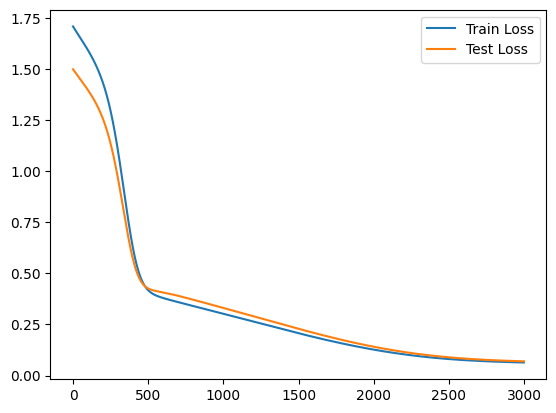

In [74]:
import matplotlib.pyplot as plt

plt.plot(running_train_loss, label='Train Loss')
plt.plot(running_test_loss, label='Test Loss')
plt.legend()
plt.show()